In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn import svm

In [2]:
data = pd.read_csv('C:/Users/rwidlk/OneDrive - IFS/Desktop/Personal/Python/datasets/loan prediction data/train_data.csv')
data.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
127,LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
364,LP002180,Male,No,0,Graduate,Yes,6822,0.0,141.0,360.0,1.0,Rural,Y
157,LP001543,Male,Yes,1,Graduate,No,9538,0.0,187.0,360.0,1.0,Urban,Y
76,LP001256,Male,No,0,Graduate,No,3750,4750.0,176.0,360.0,1.0,Urban,N
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
255,LP001846,Female,No,3+,Graduate,No,3083,0.0,255.0,360.0,1.0,Rural,Y
458,LP002472,Male,No,2,Graduate,No,4354,0.0,136.0,360.0,1.0,Rural,Y
72,LP001248,Male,No,0,Graduate,No,3500,0.0,81.0,300.0,1.0,Semiurban,Y
420,LP002348,Male,Yes,0,Graduate,No,5829,0.0,138.0,360.0,1.0,Rural,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
d = data.describe(include='all')
d.transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001357,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [28]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

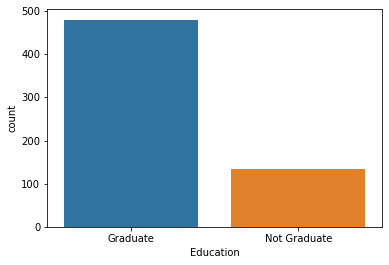

In [8]:
#data['Education'].value_counts().plot(kind='bar')
sns.countplot(x ='Education', data = data)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

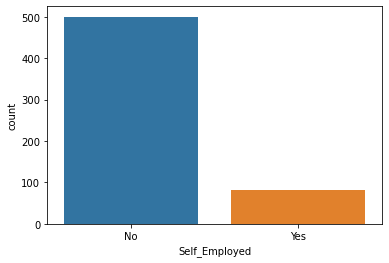

In [9]:
#data['Self_Employed'].value_counts().plot(kind='bar')
sns.countplot(x ='Self_Employed', data = data)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

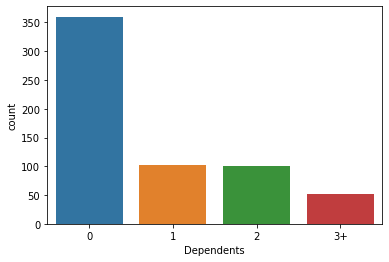

In [53]:
sns.countplot(x ='Dependents', data = data)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

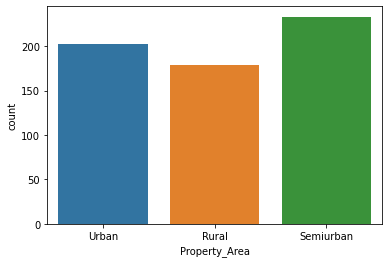

In [10]:
#data['Property_Area'].value_counts().plot(kind='bar')
sns.countplot(x ='Property_Area', data = data)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

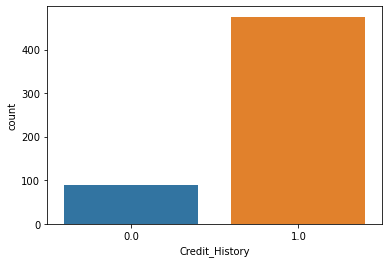

In [11]:
#data['Credit_History'].value_counts().plot(kind='bar')
sns.countplot(x ='Credit_History', data = data)

In [13]:
data['Gender'] = data["Gender"].fillna(data['Gender'].mode()[0])
data['Married'] = data["Married"].fillna(data['Married'].mode()[0])
data['Self_Employed'] = data["Self_Employed"].fillna(data['Self_Employed'].mode()[0])
data['Dependents'] = data["Dependents"].fillna(data['Dependents'].mode()[0])
data['Credit_History'] = data["Credit_History"].fillna(data['Credit_History'].mode()[0])

In [14]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

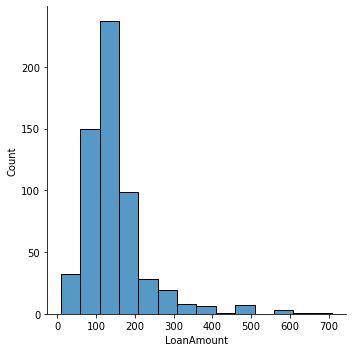

In [15]:
sns.displot(data, x="LoanAmount",binwidth=50)

<AxesSubplot:xlabel='LoanAmount'>

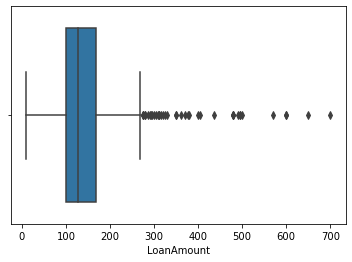

In [16]:
sns.boxplot(x="LoanAmount", data=data)

In [37]:
data['LoanAmount'].describe()

count    614.000000
mean     145.752443
std       84.107233
min        9.000000
25%      100.250000
50%      128.000000
75%      164.750000
max      700.000000
Name: LoanAmount, dtype: float64

Due to the presence of many outliers in the variable, a masure which does not effect from the outliers has been chosen. which is the median.

In [18]:
data['LoanAmount'] = data["LoanAmount"].fillna(data['LoanAmount'].median())

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

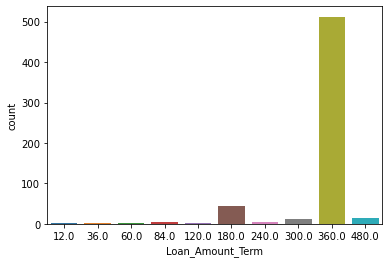

In [22]:
sns.countplot(data=data, x="Loan_Amount_Term")

In [24]:
data['Loan_Amount_Term'] = data["Loan_Amount_Term"].fillna(data['Loan_Amount_Term'].mode()[0])

In [27]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

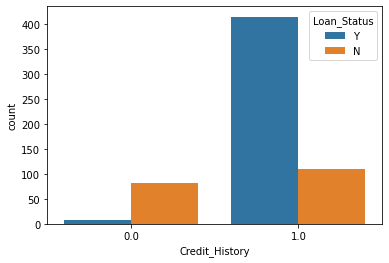

In [36]:
#pd.crosstab(data['Loan_Status'], data['Credit_History'], margins=True, margins_name='Total')
sns.countplot(data=data, x='', hue='Loan_Status')

In [63]:
data['Gender_n'] = np.where(data["Gender"]=='Male',1,0)
data['Married_n'] = np.where(data["Married"]=='Yes',1,0)
data['Self_Employed_n'] = np.where(data["Self_Employed"]=='Yes',1,0)
data['Credit_History_n'] = np.where(data["Credit_History"]==1.0,1,0)
data['Education_n'] = np.where(data["Education"]=='Graduate',1,0)

C:\Users\rwidlk\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\rwidlk\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


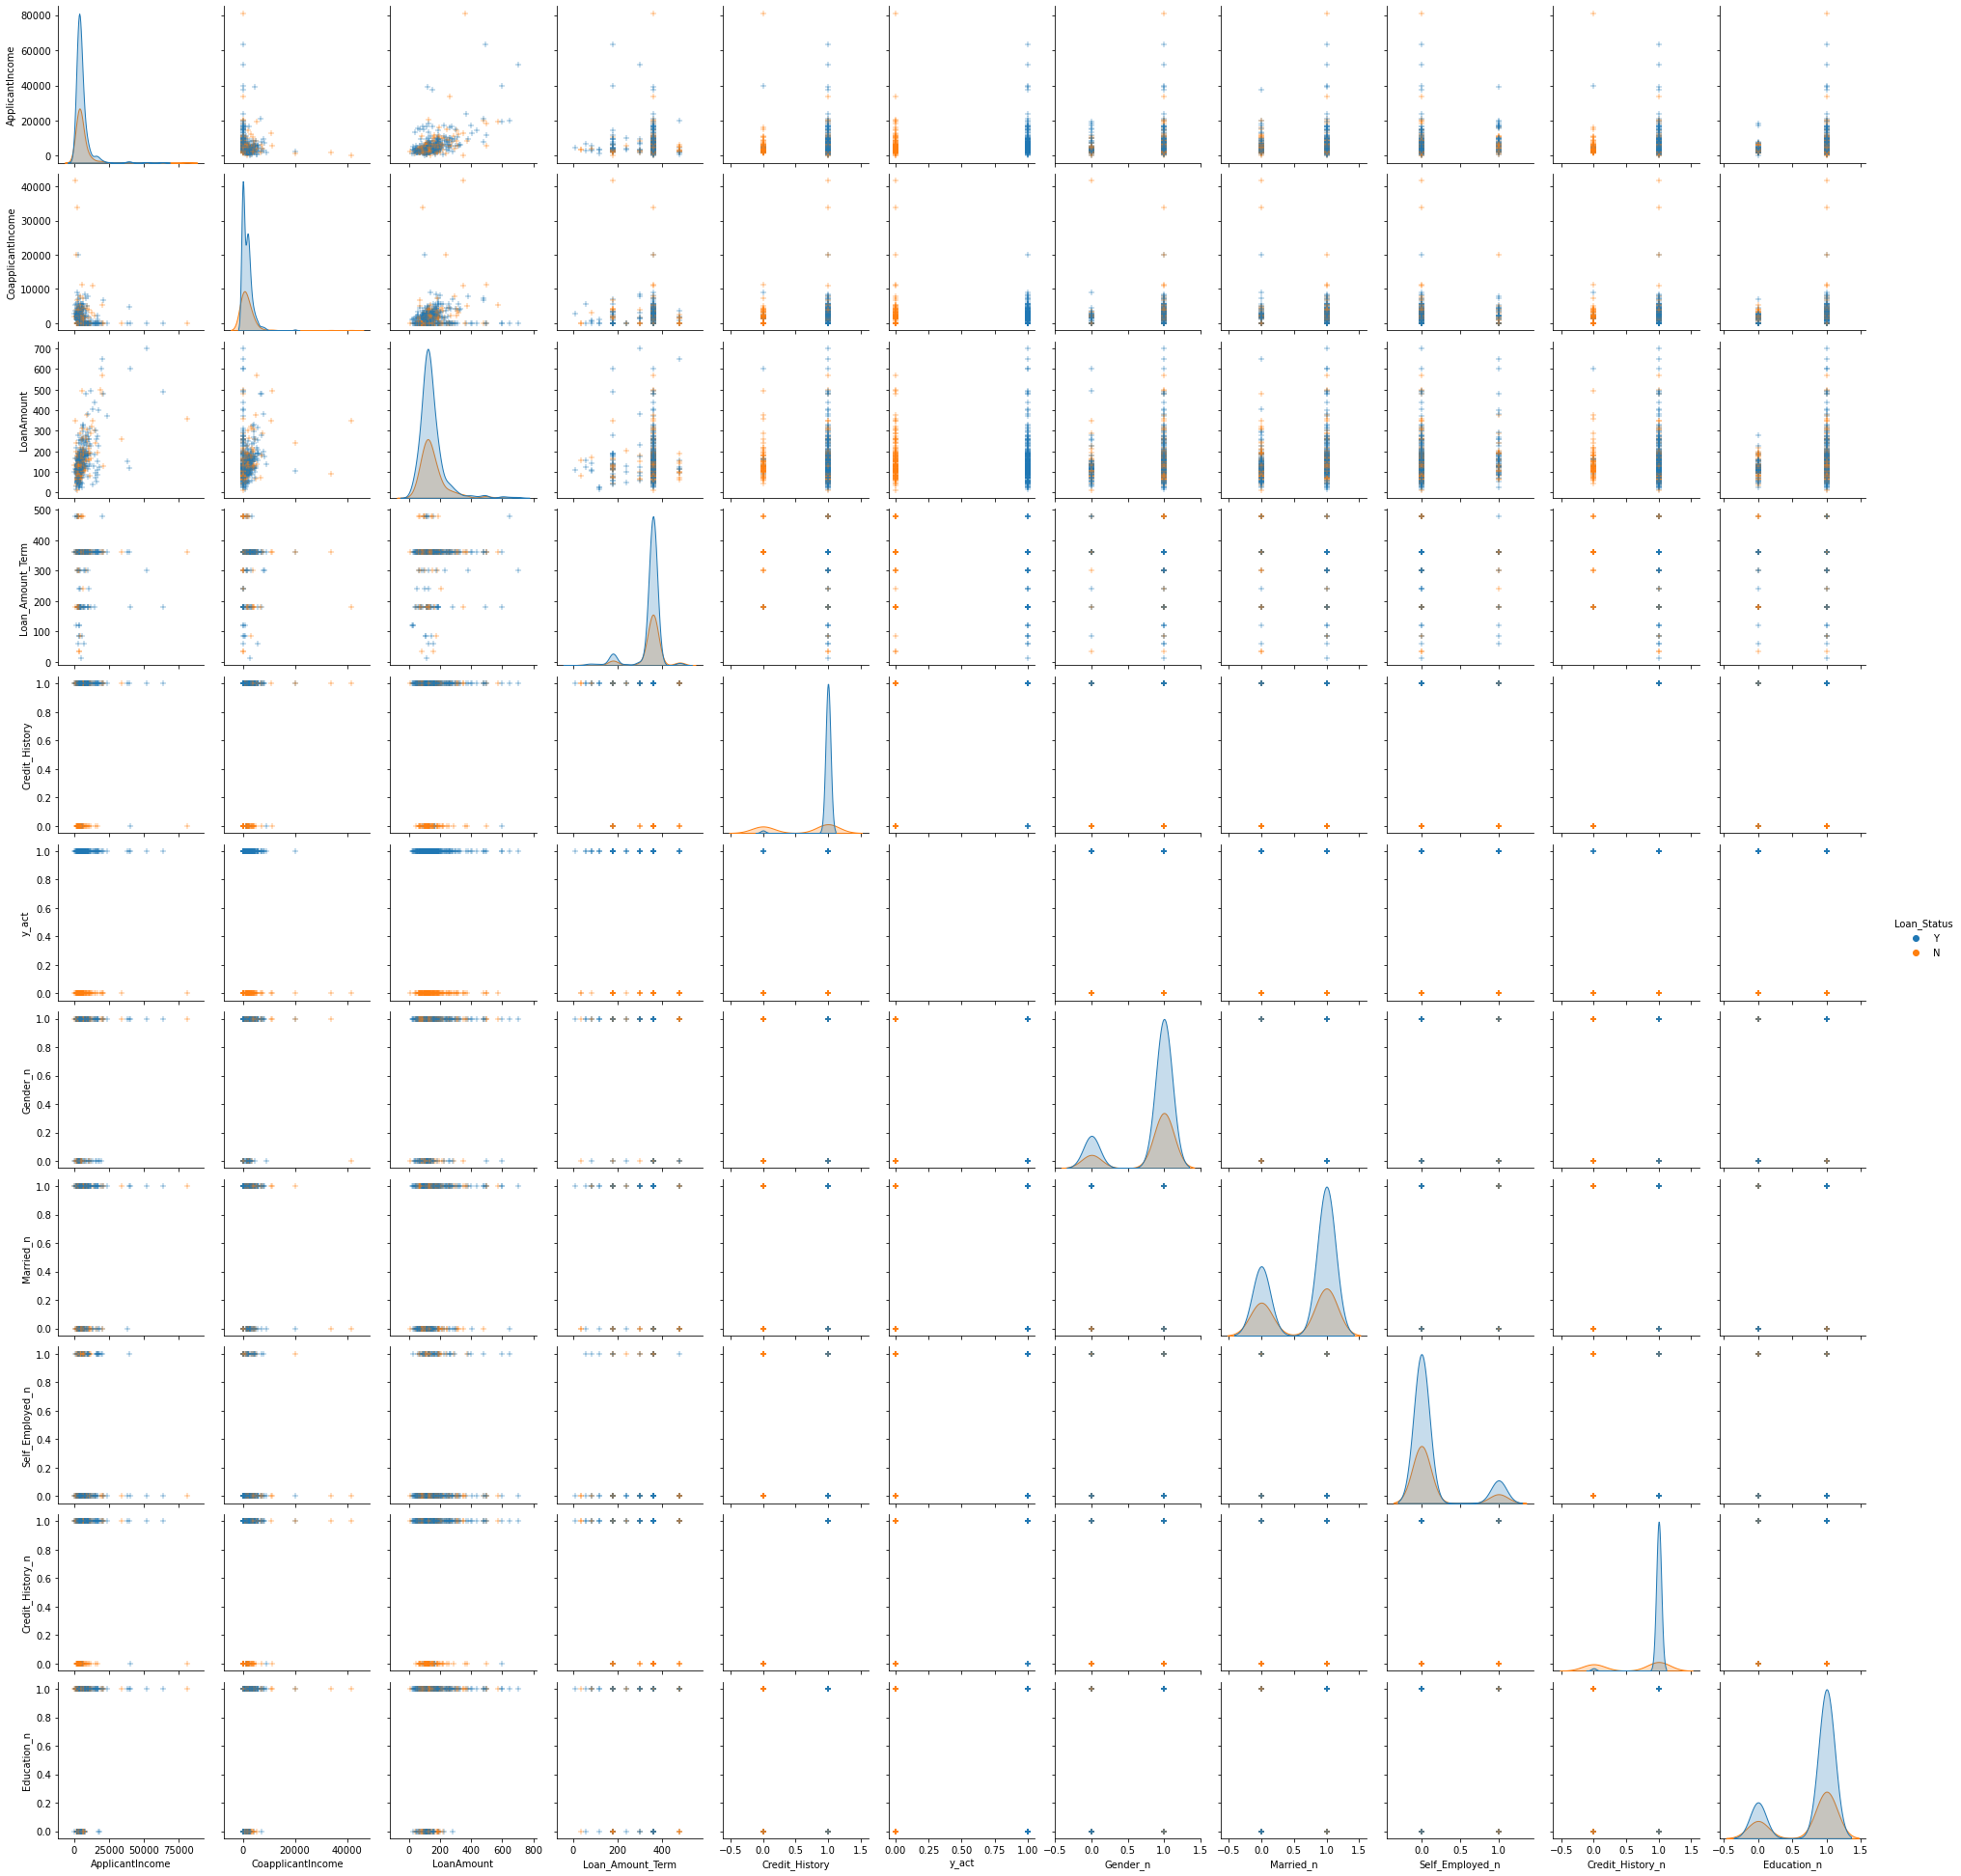

In [64]:
sns.pairplot(data, hue='Loan_Status', markers='+')
plt.show()

In [65]:
data['y_act'] = np.where(data['Loan_Status']=='Y',1,0)

In [66]:
data[['Loan_Status','y_act']]

,Loan_Status,y_act
0,Y,1
1,N,0
2,Y,1
3,Y,1
4,Y,1
...,...,...
609,Y,1
610,Y,1
611,Y,1
612,Y,1


In [99]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
y_act                0
Gender_n             0
Married_n            0
Self_Employed_n      0
Credit_History_n     0
Education_n          0
dtype: int64

,LoanAmount,CoapplicantIncome,ApplicantIncome,Loan_Amount_Term,Gender_n,Married_n,Self_Employed_n,Credit_History_n,Education_n,y_act
LoanAmount,1.000000,0.189218,0.565181,0.036960,0.106904,0.146546,0.115100,-0.000607,0.168759,-0.033214
CoapplicantIncome,0.189218,1.000000,-0.116605,-0.059383,0.082912,0.075948,-0.016100,0.011134,0.062290,-0.059187
ApplicantIncome,0.565181,-0.116605,1.000000,-0.046531,0.058809,0.051708,0.127180,-0.018615,0.140760,-0.004710
Loan_Amount_Term,0.036960,-0.059383,-0.046531,1.000000,-0.074030,-0.100912,-0.033739,-0.004705,0.073928,-0.022549
Gender_n,0.106904,0.082912,0.058809,-0.074030,1.000000,0.364569,-0.000525,0.009170,-0.045364,0.017987
Married_n,0.146546,0.075948,0.051708,-0.100912,0.364569,1.000000,0.004489,0.010938,-0.012304,0.091478
Self_Employed_n,0.115100,-0.016100,0.127180,-0.033739,-0.000525,0.004489,1.000000,-0.001550,0.010383,-0.003700
Credit_History_n,-0.000607,0.011134,-0.018615,-0.004705,0.009170,0.010938,-0.001550,1.000000,0.073658,0.540556
Education_n,0.168759,0.062290,0.140760,0.073928,-0.045364,-0.012304,0.010383,0.073658,1.000000,0.085884
y_act,-0.033214,-0.059187,-0.004710,-0.022549,0.017987,0.091478,-0.003700,0.540556,0.085884,1.000000


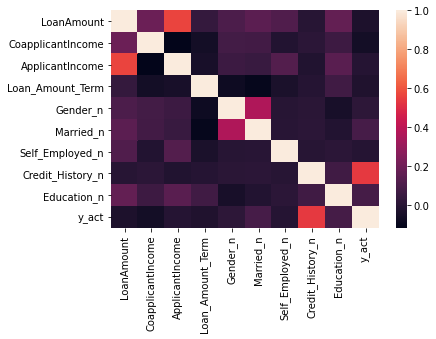

In [67]:
correlation_matrix = data[['LoanAmount', 'CoapplicantIncome', 'ApplicantIncome','Loan_Amount_Term','Gender_n',
                           'Married_n','Self_Employed_n','Credit_History_n','Education_n', 'y_act']].corr()

sns.heatmap(correlation_matrix)
correlation_matrix

# Model Building

In [84]:
model = LogisticRegression()

In [85]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'y_act', 'Gender_n', 'Married_n', 'Self_Employed_n', 'Credit_History_n',
       'Education_n'],
      dtype='object')

In [86]:
X_variables = [ 'LoanAmount', 'CoapplicantIncome', 'ApplicantIncome','Loan_Amount_Term','Gender_n',
                           'Married_n','Self_Employed_n','Credit_History_n','Education_n']
data[X_variables].head()

,LoanAmount,CoapplicantIncome,ApplicantIncome,Loan_Amount_Term,Gender_n,Married_n,Self_Employed_n,Credit_History_n,Education_n
0,128.0,0.0,5849,360.0,1,0,0,1,1
1,128.0,1508.0,4583,360.0,1,1,0,1,1
2,66.0,0.0,3000,360.0,1,1,1,1,1
3,120.0,2358.0,2583,360.0,1,1,0,1,0
4,141.0,0.0,6000,360.0,1,0,0,1,1


In [87]:
y_varibale = 'y_act'
data[y_varibale].head()

0    1
1    0
2    1
3    1
4    1
Name: y_act, dtype: int32

In [88]:
X = data[X_variables].values
X[:5]

array([[1.280e+02, 0.000e+00, 5.849e+03, 3.600e+02, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00],
       [1.280e+02, 1.508e+03, 4.583e+03, 3.600e+02, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00],
       [6.600e+01, 0.000e+00, 3.000e+03, 3.600e+02, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00],
       [1.200e+02, 2.358e+03, 2.583e+03, 3.600e+02, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00],
       [1.410e+02, 0.000e+00, 6.000e+03, 3.600e+02, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00]])

In [89]:
y = data[y_varibale].values
y[:5]

array([1, 0, 1, 1, 1])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [94]:
print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 429
Test sample size  = 185


In [100]:
model.fit(X_train, y_train)

C:\Users\rwidlk\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
# Probability
model.predict_proba(X_test)[:5]

array([[0.19754295, 0.80245705],
       [0.17432281, 0.82567719],
       [0.18452569, 0.81547431],
       [0.15918423, 0.84081577],
       [0.22349223, 0.77650777]])

In [102]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0])

In [105]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred})
test_result.head()

,y_act,y_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [106]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,All
y_act,,,
0,27,38,65
1,2,118,120
All,29,156,185


In [107]:
acuracy = (cfm.loc[0,0] + cfm.loc[1,1] )/ cfm.loc['All','All'] 
acuracy

0.7837837837837838

In [108]:
# Use Scikit-Learn function (lgr = Logistic Regression)
acuracy_lgr = metrics.accuracy_score(test_result['y_act'], test_result['y_pred']) 
acuracy_lgr

0.7837837837837838

In [109]:
f1_score_lgr = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_lgr

0.7564817361302097